# Pseudobulk degs analysis in AIM1 AIFI L3 level - CertPro data

In [ ]:
# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library("tidyverse")
quiet_library("ggplot2")
quiet_library("Matrix")
quiet_library("DESeq2")
quiet_library("dplyr")
quiet_library("SingleCellExperiment")
quiet_library("ggpubr")
quiet_library("knitr")
quiet_library("plotly")


In [ ]:
# define the color palette to be used
npg_color <- c(
    "#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF",
    "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"
)
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c(
    "#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A",
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999",
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00"
)
ari_con_colors <- c("#4C8CBD", "#F59F00")
cluster_colors_ext <- colorRampPalette(cluster_colors)(36)
options(repr.plot.width = 20, repr.plot.height = 15)


In [ ]:
# define working path
data_path <- "/home/jupyter/data/ra_longitudinal/scrna/certPro"
output_path <- "/home/jupyter/data/ra_longitudinal/output_results/certPro"
fig_path <- "/home/jupyter/data/ra_longitudinal/figures/certPro"
proj_name <- "ALTRA_scRNA_AIFI_L3_Pseudobulk_certPro_"


In [ ]:
source("/home/jupyter/github/ra-longitudinal/scRNA/ALTRA_scRNA_R_helper_functions.r")


# loading the pseudobulk data

In [5]:
aim1_pb <- readRDS(file.path(
    data_path,
    "ALTRA_scRNA_AIFI_L3_Pseudobulk_certPro_AIM1_psedobulk_object_list.rds"
))


In [6]:
aim1_pb


$`Activated memory B cell`
class: SummarizedExperiment 
dim: 888 4 
metadata(0):
assays(1): counts
rownames(888): AC004687.1 AC007952.4 ... ZNF706 ZRANB2
rowData names(0):
colnames: NULL
colData names(35): index batch_id ... psbulk_n_cells psbulk_counts

$`Activated memory B cell_uk1`
class: SummarizedExperiment 
dim: 763 2 
metadata(0):
assays(1): counts
rownames(763): ABRACL AC004687.1 ... ZNF706 ZRANB2
rowData names(0):
colnames: NULL
colData names(35): index batch_id ... psbulk_n_cells psbulk_counts

$`Adaptive NK cell`
class: SummarizedExperiment 
dim: 1917 70 
metadata(0):
assays(1): counts
rownames(1917): AAK1 ABCF1 ... ZNRD1 ZRANB2
rowData names(0):
colnames: NULL
colData names(35): index batch_id ... psbulk_n_cells psbulk_counts

$`Adaptive NK cell_uk1_T`
class: SummarizedExperiment 
dim: 1195 22 
metadata(0):
assays(1): counts
rownames(1195): AAK1 ABCF1 ... ZNHIT1 ZRANB2
rowData names(0):
colnames: NULL
colData names(35): index batch_id ... psbulk_n_cells psbulk_counts

$ASDC

In [7]:
aim1_pb %>% length()


[1] 84

In [8]:
names(aim1_pb)


[1] "Activated memory B cell"             
 [2] "Activated memory B cell_uk1"         
 [3] "Adaptive NK cell"                    
 [4] "Adaptive NK cell_uk1_T"              
 [5] "ASDC"                                
 [6] "C1Q+ CD16 monocyte"                  
 [7] "CD14+ cDC2"                          
 [8] "CD27- effector B cell"               
 [9] "CD27+ effector B cell"               
[10] "CD4 MAIT"                            
[11] "CD56bright NK cell"                  
[12] "CD8 MAIT"                            
[13] "CD8aa"                               
[14] "CD95 memory B cell"                  
[15] "cDC1"                                
[16] "CLP cell"                            
[17] "CM CD4 T cell"                       
[18] "CM CD4 T cell_uk1_CD8"               
[19] "CM CD4 T cell_uk2"                   
[20] "CM CD8 T cell"                       
[21] "CMP cell"                            
[22] "Core CD14 monocyte"                  
[23] "Core CD16 monocyte"                  
[24] "Core memory B cell"                  
[25] "Core naive B cell"                   
[26] "Core naive CD4 T cell"               
[27] "Core naive CD8 T cell"               
[28] "DN T cell"                           
[29] "Early memory B cell"                 
[30] "Early memory B cell_uk1"             
[31] "Erythrocyte"                         
[32] "GZMB- CD27- EM CD4 T cell"           
[33] "GZMB- CD27- EM CD4 T cell_uk1_CD8"   
[34] "GZMB- CD27+ EM CD4 T cell"           
[35] "GZMB- CD27+ EM CD4 T cell_uk1_CD8"   
[36] "GZMB+ Vd2 gdT"                       
[37] "GZMK- CD27+ EM CD8 T cell"           
[38] "GZMK- CD56dim NK cell"               
[39] "GZMK+ CD27+ EM CD8 T cell"           
[40] "GZMK+ CD27+ EM CD8 T cell_uk1_gdt"   
[41] "GZMK+ CD56dim NK cell"               
[42] "GZMK+ memory CD4 Treg"               
[43] "GZMK+ Vd2 gdT"                       
[44] "HLA-DRhi cDC2"                       
[45] "IL1B+ CD14 monocyte"                 
[46] "ILC"                                 
[47] "Intermediate monocyte"               
[48] "ISG+ CD14 monocyte"                  
[49] "ISG+ CD16 monocyte"                  
[50] "ISG+ CD56dim NK cell"                
[51] "ISG+ cDC2"                           
[52] "ISG+ MAIT"                           
[53] "ISG+ memory CD4 T cell"              
[54] "ISG+ memory CD4 T cell_uk1_CD8"      
[55] "ISG+ memory CD8 T cell"              
[56] "ISG+ naive B cell"                   
[57] "ISG+ naive CD4 T cell"               
[58] "ISG+ naive CD8 T cell"               
[59] "KLRB1+ memory CD4 Treg"              
[60] "KLRB1+ memory CD8 Treg"              
[61] "KLRF1- effector Vd1 gdT"             
[62] "KLRF1- GZMB+ CD27- EM CD8 T cell"    
[63] "KLRF1- GZMB+ CD27- memory CD4 T cell"
[64] "KLRF1-_GZMB+_CD27-_EM_CD8_uk1"       
[65] "KLRF1-_GZMB+_CD27-_mem_CD4_uk1"      
[66] "KLRF1+ effector Vd1 gdT"             
[67] "KLRF1+ GZMB+ CD27- EM CD8 T cell"    
[68] "KLRF1+_GZMB+_CD27-_EM_CD8_uk2"       
[69] "KLRF1+GZMB+_CD27-_EM_CD8_uk3"        
[70] "Memory CD4 Treg"                     
[71] "Memory CD8 Treg"                     
[72] "Naive CD4 Treg"                      
[73] "Naive Vd1 gdT"                       
[74] "pDC"                                 
[75] "Plasma cell"                         
[76] "Platelet"                            
[77] "Proliferating NK cell"               
[78] "Proliferating T cell"                
[79] "SOX4+ naive CD4 T cell"              
[80] "SOX4+ naive CD8 T cell"              
[81] "SOX4+ Vd1 gdT"                       
[82] "T2MBC_uk1"                           
[83] "Transitional B cell"                 
[84] "Type 2 polarized memory B cell"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


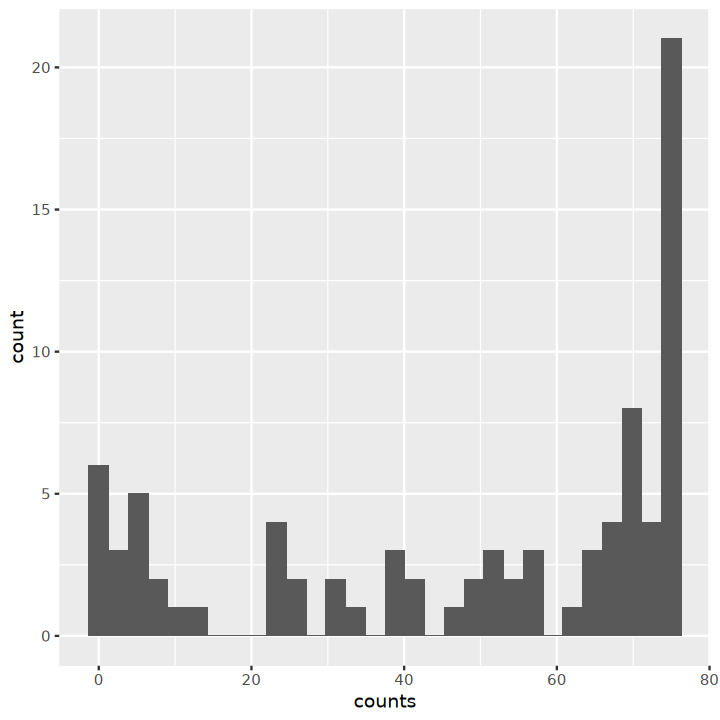

In [9]:
# check home many samples are present for each cell type
options(repr.plot.width = 6, repr.plot.height = 6)
sample_numbers <- lapply(aim1_pb, ncol) %>%
    as.list() %>%
    as_tibble() %>%
    pivot_longer(
        cols = where(is.numeric),
        names_to = "cell_type", values_to = "counts"
    )
sample_numbers %>% ggplot(aes(x = counts)) +
    geom_histogram()


In [10]:
colnames(colData(aim1_pb[[1]]))


[1] "index"                               "batch_id"                           
 [3] "hto_barcode"                         "hto_category"                       
 [5] "pbmc_sample_id"                      "pool_id"                            
 [7] "sample.sampleKitGuid"                "cohort.cohortGuid"                  
 [9] "subject.subjectGuid"                 "subject.biologicalSex"              
[11] "subject.race"                        "subject.ethnicity"                  
[13] "subject.birthYear"                   "sample.visitName"                   
[15] "sample.drawDate"                     "sample.diseaseStatesRecordedAtVisit"
[17] "sample.daysSinceFirstVisit"          "file.id"                            
[19] "subset_grp"                          "predicted_doublet"                  
[21] "AIFI_L3"                             "doublets_manual"                    
[23] "AIFI_L3_new"                         "Status_Xsec"                        
[25] "Status_Long"                         "anti_ccp3_finalCombined"            
[27] "days_to_conversion"                  "BMI"                                
[29] "CMV_Status_Subj"                     "age_conv"                           
[31] "bmi_conv"                            "file.batchID"                       
[33] "status"                              "psbulk_n_cells"                     
[35] "psbulk_counts"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


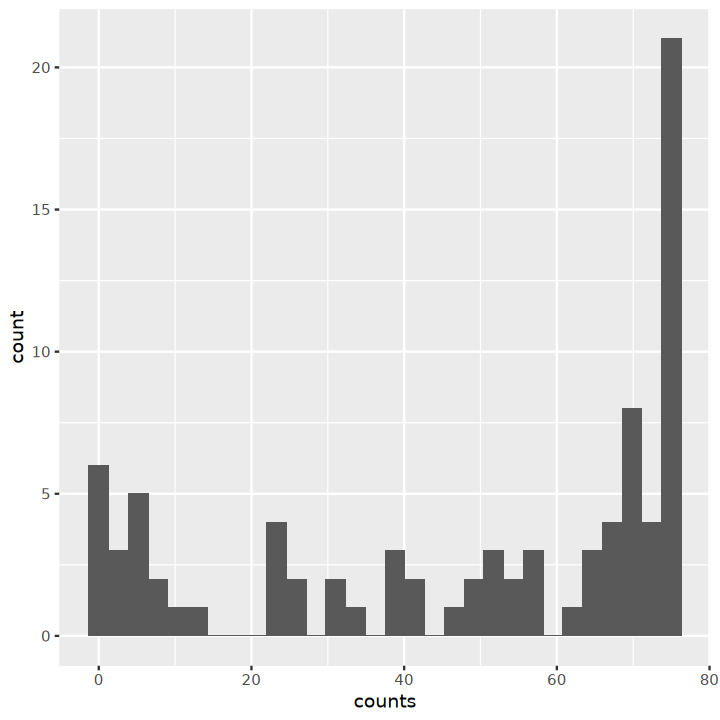

In [11]:
sample_numbers <- lapply(aim1_pb, ncol) %>%
    as.list() %>%
    as_tibble() %>%
    pivot_longer(
        cols = where(is.numeric),
        names_to = "cell_type", values_to = "counts"
    )
sample_numbers %>% ggplot(aes(x = counts)) +
    geom_histogram()


In [12]:
sample_numbers


cell_type,counts
<chr>,<int>
Activated memory B cell,4
Activated memory B cell_uk1,2
Adaptive NK cell,70
Adaptive NK cell_uk1_T,22
ASDC,1
C1Q+ CD16 monocyte,70
CD14+ cDC2,70
CD27- effector B cell,66
CD27+ effector B cell,70


In [13]:
# check the samples numbers
count_status <- function(x, celltype_col = "AIFI_L3_new", group_col = "Status_Xsec") {
    sample_counts <- colData(x) %>%
        as_tibble() %>%
        group_by(.data[[group_col]]) %>%
        summarise(
            sample_number = n(),
            cell_type = unique(.data[[celltype_col]])
        )
    return(sample_counts)
}

# Applying the function to each SCE object in the list
status_counts <- lapply(aim1_pb, count_status) %>%
    data.table::rbindlist() %>%
    pivot_wider(
        id_cols = "cell_type", names_from = "Status_Xsec",
        values_from = "sample_number", values_fill = 0
    )


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


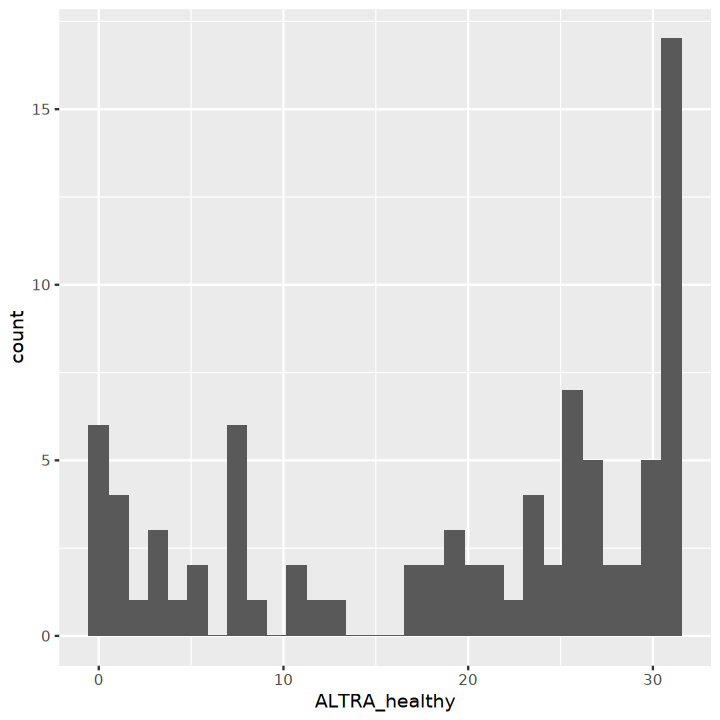

In [14]:
status_counts %>% ggplot(aes(x = ALTRA_healthy)) +
    geom_histogram()


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


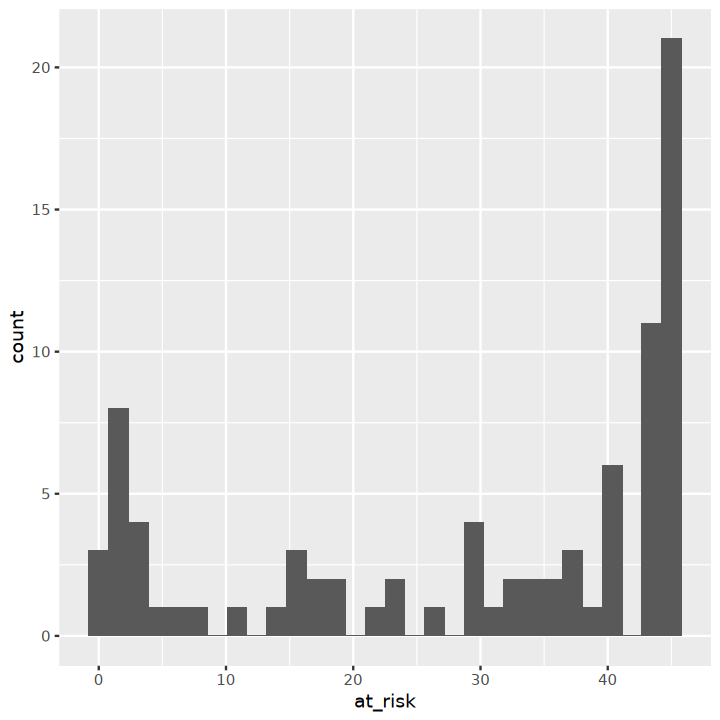

In [15]:
status_counts %>% ggplot(aes(x = at_risk)) +
    geom_histogram()


In [16]:
# selecting celltypes that has atleast 5 at-risk samples and 5 HC samples
status_counts_fl <- status_counts %>% filter(at_risk >= 5 & ALTRA_healthy >= 5)


In [17]:
cell_types_to_keep <- status_counts_fl %>% pull(cell_type)
cell_types_to_keep %>% length()


[1] 67

In [18]:
# check cell types being drop
names(aim1_pb)[!names(aim1_pb) %in% cell_types_to_keep]


[1] "Activated memory B cell"        "Activated memory B cell_uk1"   
 [3] "ASDC"                           "CLP cell"                      
 [5] "Early memory B cell_uk1"        "GZMK+ memory CD4 Treg"         
 [7] "ILC"                            "ISG+ MAIT"                     
 [9] "ISG+ memory CD4 T cell_uk1_CD8" "ISG+ naive CD8 T cell"         
[11] "KLRB1+ memory CD8 Treg"         "KLRF1-_GZMB+_CD27-_EM_CD8_uk1" 
[13] "KLRF1-_GZMB+_CD27-_mem_CD4_uk1" "KLRF1+_GZMB+_CD27-_EM_CD8_uk2" 
[15] "Memory CD8 Treg"                "SOX4+ Vd1 gdT"                 
[17] "T2MBC_uk1"

## subsetting only 67 celltypes from entire pseudobulk object(aim1_pb)

In [19]:
all(cell_types_to_keep %in% names(aim1_pb))


[1] TRUE

In [20]:
subset_aim1_pb <- aim1_pb[names(aim1_pb) %in% cell_types_to_keep]


In [21]:
subset_aim1_pb


$`Adaptive NK cell`
class: SummarizedExperiment 
dim: 1917 70 
metadata(0):
assays(1): counts
rownames(1917): AAK1 ABCF1 ... ZNRD1 ZRANB2
rowData names(0):
colnames: NULL
colData names(35): index batch_id ... psbulk_n_cells psbulk_counts

$`Adaptive NK cell_uk1_T`
class: SummarizedExperiment 
dim: 1195 22 
metadata(0):
assays(1): counts
rownames(1195): AAK1 ABCF1 ... ZNHIT1 ZRANB2
rowData names(0):
colnames: NULL
colData names(35): index batch_id ... psbulk_n_cells psbulk_counts

$`C1Q+ CD16 monocyte`
class: SummarizedExperiment 
dim: 4371 70 
metadata(0):
assays(1): counts
rownames(4371): AAED1 AAK1 ... ZYX ZZEF1
rowData names(0):
colnames: NULL
colData names(35): index batch_id ... psbulk_n_cells psbulk_counts

$`CD14+ cDC2`
class: SummarizedExperiment 
dim: 6186 70 
metadata(0):
assays(1): counts
rownames(6186): A1BG AAED1 ... ZYX ZZEF1
rowData names(0):
colnames: NULL
colData names(35): index batch_id ... psbulk_n_cells psbulk_counts

$`CD27- effector B cell`
class: SummarizedExper

In [22]:
subset_aim1_pb %>% length()


[1] 67

# Run DEG on subset celltypes from above results 

In [23]:
colData(subset_aim1_pb[["CM CD4 T cell"]]) %>% colnames()


[1] "index"                               "batch_id"                           
 [3] "hto_barcode"                         "hto_category"                       
 [5] "pbmc_sample_id"                      "pool_id"                            
 [7] "sample.sampleKitGuid"                "cohort.cohortGuid"                  
 [9] "subject.subjectGuid"                 "subject.biologicalSex"              
[11] "subject.race"                        "subject.ethnicity"                  
[13] "subject.birthYear"                   "sample.visitName"                   
[15] "sample.drawDate"                     "sample.diseaseStatesRecordedAtVisit"
[17] "sample.daysSinceFirstVisit"          "file.id"                            
[19] "subset_grp"                          "predicted_doublet"                  
[21] "AIFI_L3"                             "doublets_manual"                    
[23] "AIFI_L3_new"                         "Status_Xsec"                        
[25] "Status_Long"                         "anti_ccp3_finalCombined"            
[27] "days_to_conversion"                  "BMI"                                
[29] "CMV_Status_Subj"                     "age_conv"                           
[31] "bmi_conv"                            "file.batchID"                       
[33] "status"                              "psbulk_n_cells"                     
[35] "psbulk_counts"

In [24]:
colData(subset_aim1_pb[["CM CD4 T cell"]]) %>%
    as_tibble() %>%
    filter(batch_id == "B182") %>%
    distinct(Status_Xsec)


Status_Xsec
<chr>
ALTRA_healthy


In [25]:
## B182 had dominant batch effect and need to adjust
subset_aim1_pb <- lapply(subset_aim1_pb, function(pb) {
    pb$batch_corr <- ifelse(pb$file.batchID == "B182", "B182", "other_batches")
    # Modify disease category in coldata and convert to factor
    # Assuming 'status' is the column you want to modify
    pb$Status_Xsec <- factor(pb$Status_Xsec, levels = c("ALTRA_healthy", "at_risk"))
    pb$batch_corr <- factor(pb$batch_corr, levels = c("other_batches", "B182"))
    pb$subject.biologicalSex <- factor(pb$subject.biologicalSex, levels = c("Female", "Male"))
    pb$age <- lubridate::year(lubridate::as_date(pb$sample.drawDate)) - as.numeric(pb$subject.birthYear)
    pb$scale_age <- scale(pb$age)
    pb$scale_bmi <- scale(pb$BMI)
    return(pb)
})


In [26]:
table(subset_aim1_pb[[1]]$batch_corr)
table(subset_aim1_pb[[1]]$Status_Xsec)



other_batches          B182 
           59            11 


ALTRA_healthy       at_risk 
           27            43 

In [27]:
subset_aim1_pb[[1]]


class: SummarizedExperiment 
dim: 1917 70 
metadata(0):
assays(1): counts
rownames(1917): AAK1 ABCF1 ... ZNRD1 ZRANB2
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi

## Run DESeq2

In [28]:
colData(subset_aim1_pb[[1]]) %>% colnames()


[1] "index"                               "batch_id"                           
 [3] "hto_barcode"                         "hto_category"                       
 [5] "pbmc_sample_id"                      "pool_id"                            
 [7] "sample.sampleKitGuid"                "cohort.cohortGuid"                  
 [9] "subject.subjectGuid"                 "subject.biologicalSex"              
[11] "subject.race"                        "subject.ethnicity"                  
[13] "subject.birthYear"                   "sample.visitName"                   
[15] "sample.drawDate"                     "sample.diseaseStatesRecordedAtVisit"
[17] "sample.daysSinceFirstVisit"          "file.id"                            
[19] "subset_grp"                          "predicted_doublet"                  
[21] "AIFI_L3"                             "doublets_manual"                    
[23] "AIFI_L3_new"                         "Status_Xsec"                        
[25] "Status_Long"                         "anti_ccp3_finalCombined"            
[27] "days_to_conversion"                  "BMI"                                
[29] "CMV_Status_Subj"                     "age_conv"                           
[31] "bmi_conv"                            "file.batchID"                       
[33] "status"                              "psbulk_n_cells"                     
[35] "psbulk_counts"                       "batch_corr"                         
[37] "age"                                 "scale_age"                          
[39] "scale_bmi"

In [29]:
subset_aim1_pb[[1]]


class: SummarizedExperiment 
dim: 1917 70 
metadata(0):
assays(1): counts
rownames(1917): AAK1 ABCF1 ... ZNRD1 ZRANB2
rowData names(0):
colnames: NULL
colData names(39): index batch_id ... scale_age scale_bmi

In [30]:
# run deseq to do deg analysis
formula <- "~ scale_age + scale_bmi + subject.biologicalSex + batch_corr + Status_Xsec"
aim1_deseq <- RunDeseq_list(subset_aim1_pb, formula)


run Deseq2 for cell type Adaptive NK cell

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

run Deseq2 for cell type Adaptive NK cell_uk1_T

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

run Deseq2 for cell type C1Q+ CD16 monocyte

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

run Deseq2 for cell type CD14+ cDC2

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

run Deseq2 for cell ty

In [31]:
# add deseq noamrlized count to the se objects
aim1_pb_norm <- addNormcountsList(subset_aim1_pb, aim1_deseq,
    method = "vst",
    assay_name = "normalized_counts"
)


Add normalized counts for Adaptive NK cell

Add normalized counts for Adaptive NK cell_uk1_T

Add normalized counts for C1Q+ CD16 monocyte

Add normalized counts for CD14+ cDC2

Add normalized counts for CD27- effector B cell

Add normalized counts for CD27+ effector B cell

Add normalized counts for CD4 MAIT

Add normalized counts for CD56bright NK cell

Add normalized counts for CD8 MAIT

Add normalized counts for CD8aa

Add normalized counts for CD95 memory B cell

Add normalized counts for cDC1

Add normalized counts for CM CD4 T cell

Add normalized counts for CM CD4 T cell_uk1_CD8

Add normalized counts for CM CD4 T cell_uk2

Add normalized counts for CM CD8 T cell

Add normalized counts for CMP cell

Add normalized counts for Core CD14 monocyte

Add normalized counts for Core CD16 monocyte

Add normalized counts for Core memory B cell

Add normalized counts for Core naive B cell

Add normalized counts for Core naive CD4 T cell

Add normalized counts for Core naive CD8 T cell

Ad

In [32]:
aim1_pb_norm %>% saveRDS(file.path(output_path, paste0(proj_name, "AIM1_norm_counts_SE_list.rds")))


In [33]:
# get deseq2 result
aim1deseq_res <- lapply(aim1_deseq, results)
names(aim1deseq_res) <- names(aim1_deseq)


In [34]:
aim1deseq_res[[1]]


log2 fold change (MLE): Status Xsec at risk vs ALTRA healthy 
Wald test p-value: Status Xsec at risk vs ALTRA healthy 
DataFrame with 1917 rows and 6 columns
         baseMean log2FoldChange     lfcSE      stat    pvalue      padj
        <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
AAK1      44.8004     0.14638778 0.1218623  1.201256 0.2296519  0.685228
ABCF1     25.4033     0.08432132 0.1128475  0.747215 0.4549337  0.851135
ABHD17A  102.8874     0.00886048 0.0634992  0.139537 0.8890259  0.976177
ABI1      17.8422    -0.10768624 0.1184165 -0.909386 0.3631467  0.798384
ABI3      25.1668     0.31505386 0.1282836  2.455916 0.0140526  0.276056
...           ...            ...       ...       ...       ...       ...
ZNF652    16.1137     -0.0798176  0.128746 -0.619961 0.5352836  0.884018
ZNF706    25.0498      0.0882721  0.089322  0.988246 0.3230321  0.776500
ZNHIT1    33.3477      0.0798120  0.121217  0.658422 0.5102667  0.879290
ZNRD1     14.8388      0.2272656  0.128

In [35]:
# extract the result as a table
aim1deseq_res_tb <- lapply(names(aim1_deseq), function(i) {
    res_tb <- aim1deseq_res[[i]] %>%
        as_tibble(rownames = "gene") %>%
        mutate(cell_type = i)
    return(res_tb)
}) %>% data.table::rbindlist()


In [36]:
aim1deseq_res_tb %>% head()


gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,cell_type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AAK1,44.80038,0.146387776,0.12186225,1.2012561,0.22965187,0.6852282,Adaptive NK cell
ABCF1,25.40334,0.084321320,0.11284745,0.7472151,0.45493374,0.8511353,Adaptive NK cell
ABHD17A,102.88741,0.008860484,0.06349922,0.1395369,0.88902590,0.9761770,Adaptive NK cell
ABI1,17.84224,-0.107686236,0.11841649,-0.9093855,0.36314667,0.7983842,Adaptive NK cell
ABI3,25.16684,0.315053857,0.12828365,2.4559160,0.01405260,0.2760555,Adaptive NK cell
ABRACL,27.57182,0.206097855,0.11835185,1.7413996,0.08161356,0.4954590,Adaptive NK cell


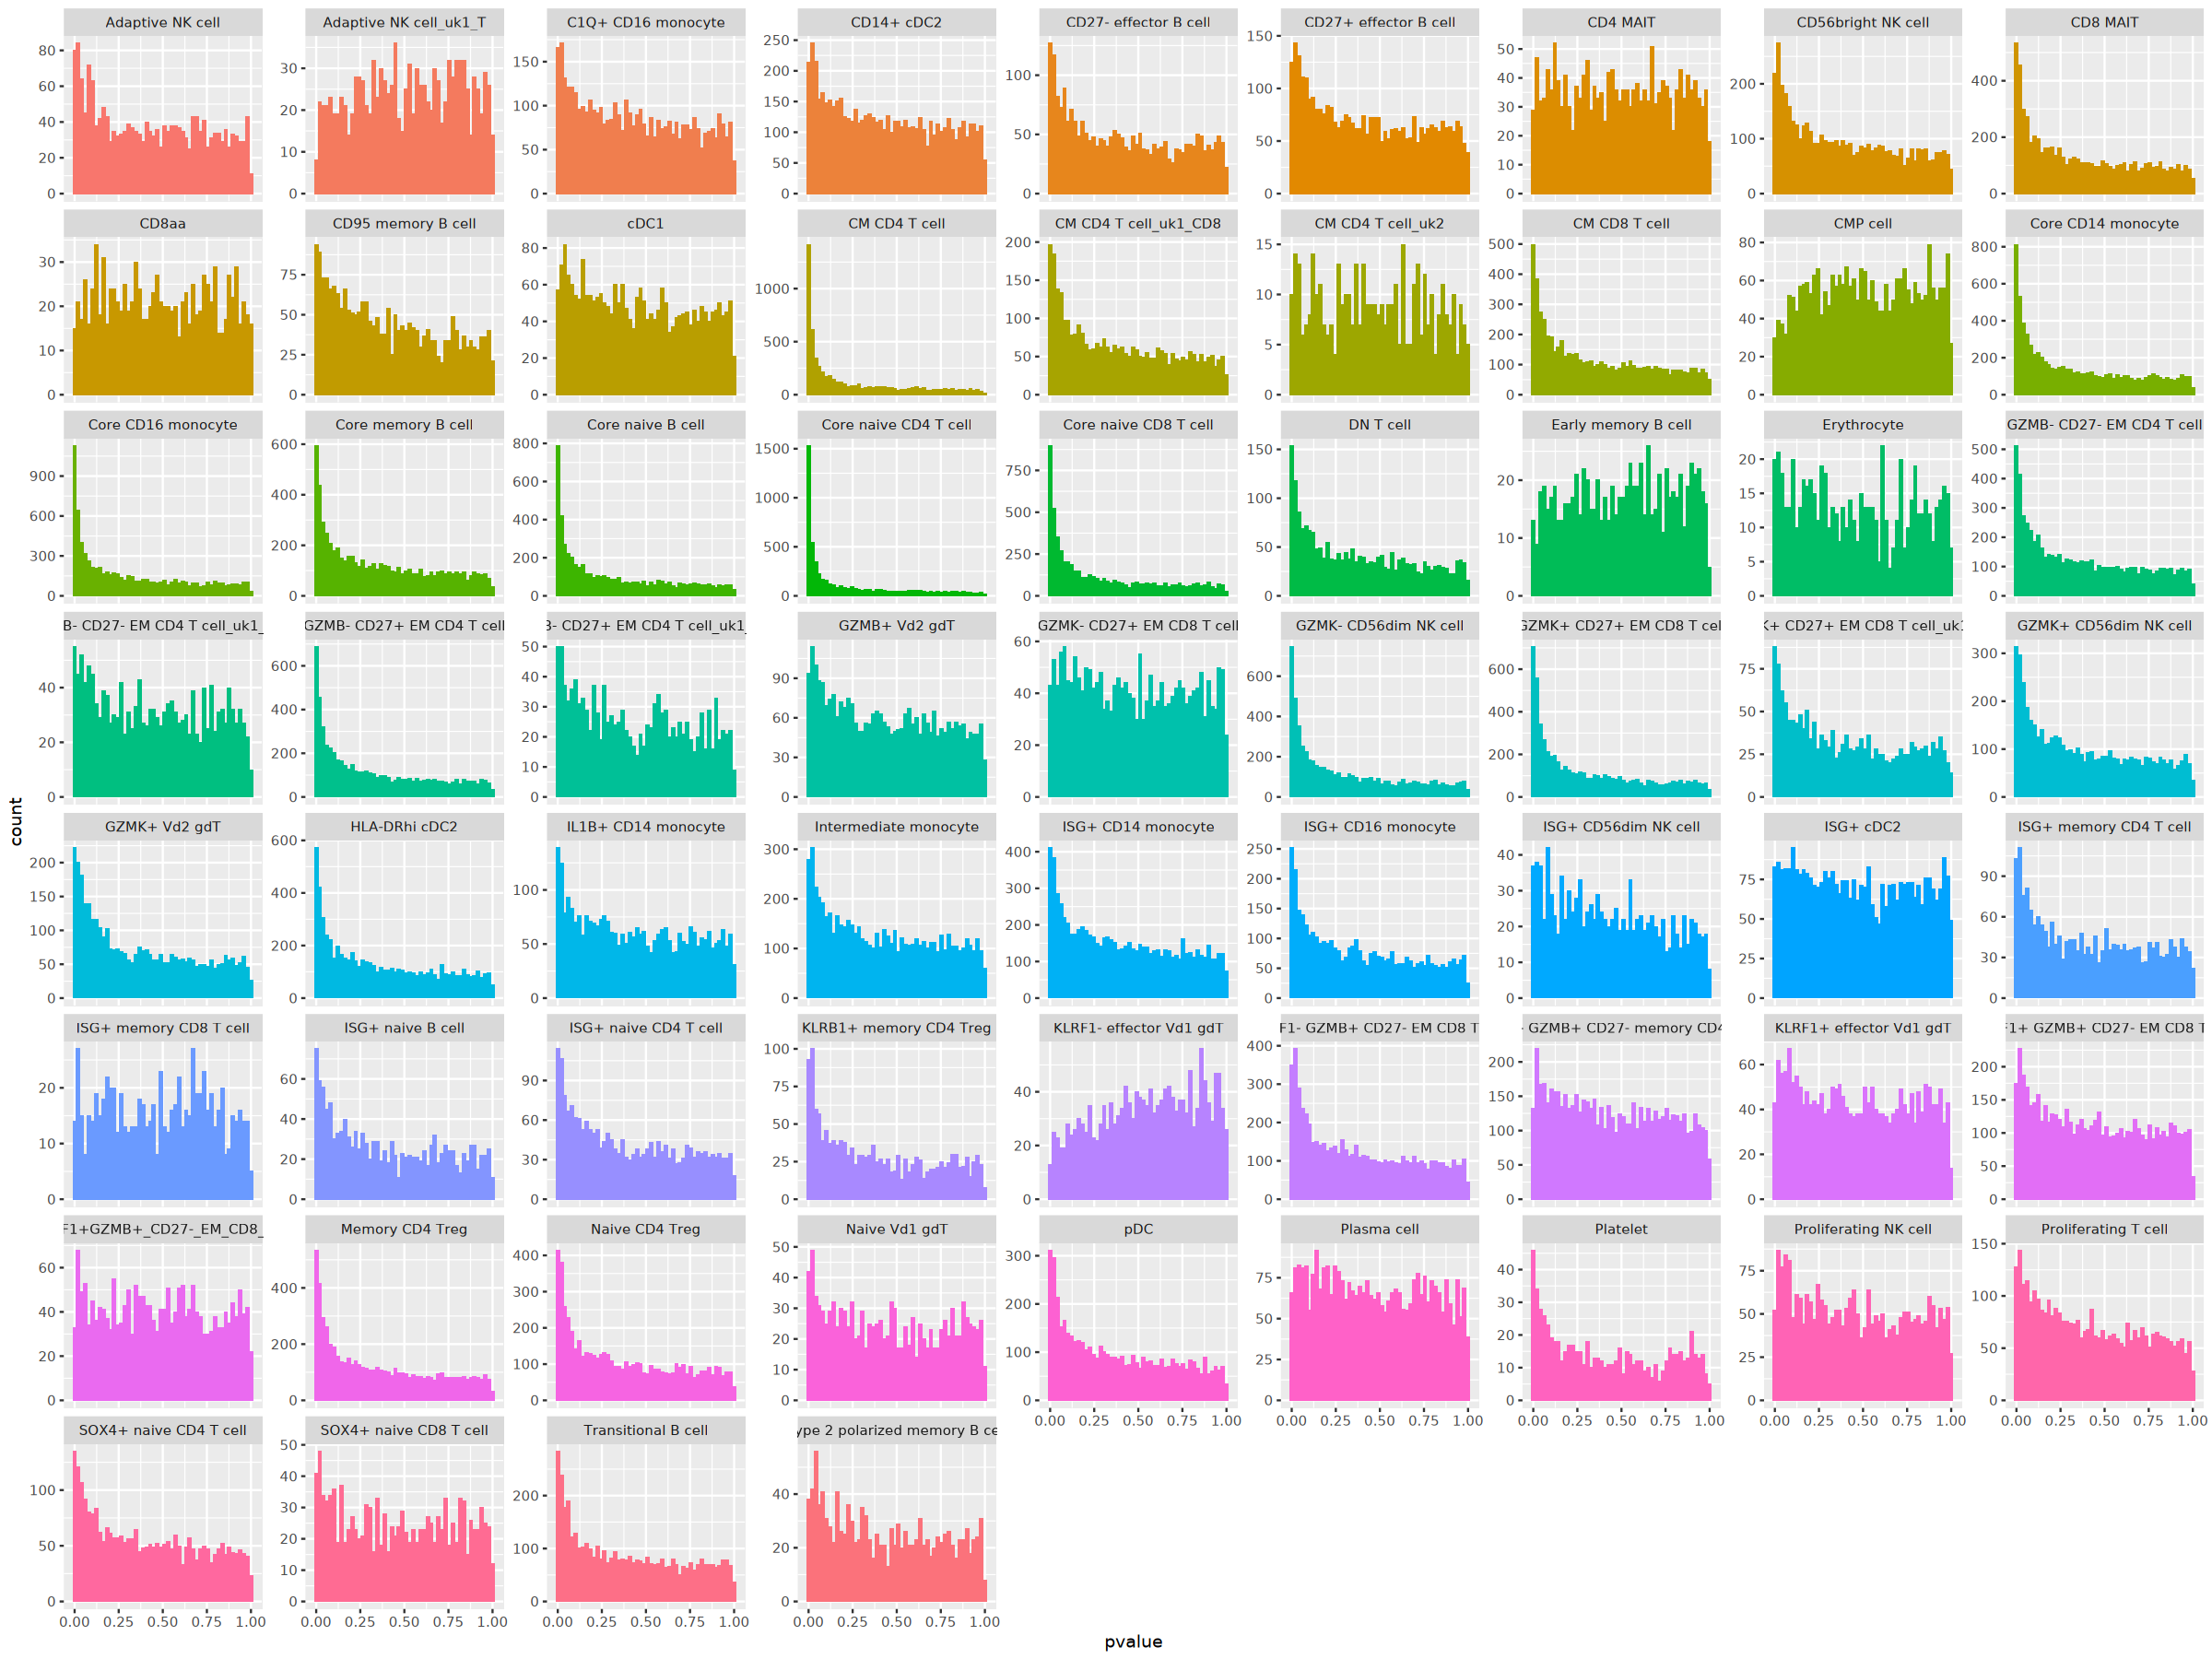

In [37]:
# plot the p values
options(repr.plot.width = 20, repr.plot.height = 15)
aim1deseq_res_tb %>% ggplot(aes(x = pvalue, fill = cell_type)) +
    geom_histogram(bins = 50) +
    facet_wrap(vars(cell_type), scales = "free_y") +
    theme(legend.position = "none")

# ggsave(file.path(fig_path, paste0(proj_name, '_p_values_distribution.png')),
#        width=16, height=12)


In [38]:
# calculate the qvalues
# library(qvalue)
calQvalue <- function(x, p_col = "p.value") {
    # test
    pvalues <- x %>% pull(.data[[p_col]])
    qvalues <- qvalue::qvalue(pvalues)$qvalues
    x <- x %>% mutate("q_values" = qvalues)
    return(x)
}
aim1deseq_res_tb <- aim1deseq_res_tb %>%
    group_by(cell_type) %>%
    group_modify(~ calQvalue(.x, p_col = "pvalue")) %>%
    rstatix::add_significance(
        p.col = "q_values", output.col = "sig",
        cutpoints = c(0, 0.05, 0.2, 1),
        symbols = c("*", "<0.2", "ns")
    )


In [39]:
aim1deseq_res_tb %>% head()


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Adaptive NK cell,AAK1,44.80038,0.146387776,0.12186225,1.2012561,0.22965187,0.6852282,0.5630065,ns
Adaptive NK cell,ABCF1,25.40334,0.084321320,0.11284745,0.7472151,0.45493374,0.8511353,0.6973416,ns
Adaptive NK cell,ABHD17A,102.88741,0.008860484,0.06349922,0.1395369,0.88902590,0.9761770,0.7940845,ns
Adaptive NK cell,ABI1,17.84224,-0.107686236,0.11841649,-0.9093855,0.36314667,0.7983842,0.6554094,ns
Adaptive NK cell,ABI3,25.16684,0.315053857,0.12828365,2.4559160,0.01405260,0.2760555,0.2357865,ns
Adaptive NK cell,ABRACL,27.57182,0.206097855,0.11835185,1.7413996,0.08161356,0.4954590,0.4120628,ns


In [40]:
aim1deseq_res_tb %>% write_csv(file.path(output_path, paste0(proj_name, "AIM1_BMI_deg_results.csv")))


In [41]:
aim1deseq_res_tb <- read_csv(file.path(output_path, paste0(proj_name, "AIM1_BMI_deg_results.csv")))
aim1deseq_res_tb %>% head()


Rows: 247391 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): cell_type, gene, sig
dbl (7): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj, q_values

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Adaptive NK cell,AAK1,44.80038,0.146387776,0.12186225,1.2012561,0.22965187,0.6852282,0.5630065,ns
Adaptive NK cell,ABCF1,25.40334,0.084321320,0.11284745,0.7472151,0.45493374,0.8511353,0.6973416,ns
Adaptive NK cell,ABHD17A,102.88741,0.008860484,0.06349922,0.1395369,0.88902590,0.9761770,0.7940845,ns
Adaptive NK cell,ABI1,17.84224,-0.107686236,0.11841649,-0.9093855,0.36314667,0.7983842,0.6554094,ns
Adaptive NK cell,ABI3,25.16684,0.315053857,0.12828365,2.4559160,0.01405260,0.2760555,0.2357865,ns
Adaptive NK cell,ABRACL,27.57182,0.206097855,0.11835185,1.7413996,0.08161356,0.4954590,0.4120628,ns


## pathway analysis

In [42]:
# load the model results
aim1_degs <- read_csv(file.path(output_path, paste0(proj_name, "AIM1_BMI_deg_results.csv")),
    show_col_types = FALSE
) %>%
    mutate(log_pval_dir = -log(pvalue) * sign(log2FoldChange))


In [43]:
aim1_degs %>% head()


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig,log_pval_dir
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Adaptive NK cell,AAK1,44.80038,0.146387776,0.12186225,1.2012561,0.22965187,0.6852282,0.5630065,ns,1.4711907
Adaptive NK cell,ABCF1,25.40334,0.084321320,0.11284745,0.7472151,0.45493374,0.8511353,0.6973416,ns,0.7876035
Adaptive NK cell,ABHD17A,102.88741,0.008860484,0.06349922,0.1395369,0.88902590,0.9761770,0.7940845,ns,0.1176289
Adaptive NK cell,ABI1,17.84224,-0.107686236,0.11841649,-0.9093855,0.36314667,0.7983842,0.6554094,ns,-1.0129485
Adaptive NK cell,ABI3,25.16684,0.315053857,0.12828365,2.4559160,0.01405260,0.2760555,0.2357865,ns,4.2649478
Adaptive NK cell,ABRACL,27.57182,0.206097855,0.11835185,1.7413996,0.08161356,0.4954590,0.4120628,ns,2.5057599


In [44]:
# only do pathway analysis for at least 30 degs
deg_counts <- aim1_degs %>%
  mutate(significance = if_else(q_values < 0.1, "sig", "ns")) %>%
  group_by(cell_type, significance) %>%
  tally()

celltypes <- deg_counts %>%
  filter(significance == "sig" & n > 10) %>%
  pull(cell_type)
celltypes


[1] "Adaptive NK cell"                    
 [2] "C1Q+ CD16 monocyte"                  
 [3] "CD14+ cDC2"                          
 [4] "CD27+ effector B cell"               
 [5] "CD27- effector B cell"               
 [6] "CD56bright NK cell"                  
 [7] "CD8 MAIT"                            
 [8] "CD95 memory B cell"                  
 [9] "CM CD4 T cell"                       
[10] "CM CD4 T cell_uk1_CD8"               
[11] "CM CD8 T cell"                       
[12] "Core CD14 monocyte"                  
[13] "Core CD16 monocyte"                  
[14] "Core memory B cell"                  
[15] "Core naive B cell"                   
[16] "Core naive CD4 T cell"               
[17] "Core naive CD8 T cell"               
[18] "DN T cell"                           
[19] "GZMB- CD27+ EM CD4 T cell"           
[20] "GZMB- CD27+ EM CD4 T cell_uk1_CD8"   
[21] "GZMB- CD27- EM CD4 T cell"           
[22] "GZMB- CD27- EM CD4 T cell_uk1_CD8"   
[23] "GZMK+ CD27+ EM CD8 T cell"           
[24] "GZMK+ CD27+ EM CD8 T cell_uk1_gdt"   
[25] "GZMK+ CD56dim NK cell"               
[26] "GZMK+ Vd2 gdT"                       
[27] "GZMK- CD56dim NK cell"               
[28] "HLA-DRhi cDC2"                       
[29] "IL1B+ CD14 monocyte"                 
[30] "ISG+ CD14 monocyte"                  
[31] "ISG+ CD16 monocyte"                  
[32] "ISG+ memory CD4 T cell"              
[33] "ISG+ naive B cell"                   
[34] "ISG+ naive CD4 T cell"               
[35] "Intermediate monocyte"               
[36] "KLRB1+ memory CD4 Treg"              
[37] "KLRF1+ GZMB+ CD27- EM CD8 T cell"    
[38] "KLRF1+ effector Vd1 gdT"             
[39] "KLRF1- GZMB+ CD27- EM CD8 T cell"    
[40] "KLRF1- GZMB+ CD27- memory CD4 T cell"
[41] "Memory CD4 Treg"                     
[42] "Naive CD4 Treg"                      
[43] "Platelet"                            
[44] "Proliferating T cell"                
[45] "SOX4+ naive CD4 T cell"              
[46] "Transitional B cell"                 
[47] "Type 2 polarized memory B cell"      
[48] "pDC"

In [46]:
# run collapsed pathway
aim1_pw_collap <- aim1_degs %>%
  RunGSEACelltype(
    ct.col = "cell_type", rank.col = "log_pval_dir",
    gene.col = "gene",
    collapsePathways = TRUE, ncores = 15
  )


run GSEA in Adaptive NK cell

run GSEA in 1917 genes



  |======================================================================| 100%



run GSEA in Adaptive NK cell_uk1_T

run GSEA in 1195 genes



  |======================================================================| 100%



run GSEA in C1Q+ CD16 monocyte

run GSEA in 4371 genes



  |======================================================================| 100%



run GSEA in CD14+ cDC2

run GSEA in 6186 genes



  |======================================================================| 100%



run GSEA in CD27+ effector B cell

run GSEA in 3566 genes



  |======================================================================| 100%



run GSEA in CD27- effector B cell

run GSEA in 2451 genes



  |======================================================================| 100%



run GSEA in CD4 MAIT

run GSEA in 1772 genes



  |======================================================================| 100%



run GSEA in CD56bright NK cell

run GSEA in 4868 genes



  |======================================================================| 100%



run GSEA in CD8 MAIT

run GSEA in 6785 genes



  |======================================================================| 100%



run GSEA in CD8aa

run GSEA in 1060 genes



  |======================================================================| 100%



run GSEA in CD95 memory B cell

run GSEA in 2257 genes



  |======================================================================| 100%



run GSEA in CM CD4 T cell

run GSEA in 5948 genes



  |======================================================================| 100%



run GSEA in CM CD4 T cell_uk1_CD8

run GSEA in 3309 genes



  |======================================================================| 100%



run GSEA in CM CD4 T cell_uk2

run GSEA in 441 genes



  |======================================================================| 100%



run GSEA in CM CD8 T cell

run GSEA in 6128 genes



  |======================================================================| 100%



run GSEA in CMP cell

run GSEA in 2693 genes



  |======================================================================| 100%



run GSEA in Core CD14 monocyte

run GSEA in 7515 genes



  |======================================================================| 100%



run GSEA in Core CD16 monocyte

run GSEA in 7996 genes



  |======================================================================| 100%



run GSEA in Core memory B cell

run GSEA in 6506 genes



  |======================================================================| 100%



run GSEA in Core naive B cell

run GSEA in 5391 genes



  |======================================================================| 100%



run GSEA in Core naive CD4 T cell

run GSEA in 5446 genes



  |======================================================================| 100%



run GSEA in Core naive CD8 T cell

run GSEA in 6022 genes



  |======================================================================| 100%



run GSEA in DN T cell

run GSEA in 2133 genes



  |======================================================================| 100%



run GSEA in Early memory B cell

run GSEA in 857 genes



  |======================================================================| 100%



run GSEA in Erythrocyte

run GSEA in 658 genes

run GSEA in GZMB+ Vd2 gdT

run GSEA in 3040 genes



  |======================================================================| 100%



run GSEA in GZMB- CD27+ EM CD4 T cell

run GSEA in 6060 genes



  |======================================================================| 100%



run GSEA in GZMB- CD27+ EM CD4 T cell_uk1_CD8

run GSEA in 1293 genes



  |======================================================================| 100%



run GSEA in GZMB- CD27- EM CD4 T cell

run GSEA in 6490 genes



  |======================================================================| 100%



run GSEA in GZMB- CD27- EM CD4 T cell_uk1_CD8

run GSEA in 1612 genes



  |======================================================================| 100%



run GSEA in GZMK+ CD27+ EM CD8 T cell

run GSEA in 6111 genes



  |======================================================================| 100%



run GSEA in GZMK+ CD27+ EM CD8 T cell_uk1_gdt

run GSEA in 1687 genes



  |======================================================================| 100%



run GSEA in GZMK+ CD56dim NK cell

run GSEA in 5183 genes



  |======================================================================| 100%



run GSEA in GZMK+ Vd2 gdT

run GSEA in 3719 genes



  |======================================================================| 100%



run GSEA in GZMK- CD27+ EM CD8 T cell

run GSEA in 2101 genes



  |======================================================================| 100%



run GSEA in GZMK- CD56dim NK cell

run GSEA in 6130 genes



  |======================================================================| 100%



run GSEA in HLA-DRhi cDC2

run GSEA in 6711 genes



  |======================================================================| 100%



run GSEA in IL1B+ CD14 monocyte

run GSEA in 3138 genes



  |======================================================================| 100%



run GSEA in ISG+ CD14 monocyte

run GSEA in 7865 genes



  |======================================================================| 100%



run GSEA in ISG+ CD16 monocyte

run GSEA in 4045 genes



  |======================================================================| 100%



run GSEA in ISG+ CD56dim NK cell

run GSEA in 1154 genes



  |======================================================================| 100%



run GSEA in ISG+ cDC2

run GSEA in 3608 genes



  |======================================================================| 100%



run GSEA in ISG+ memory CD4 T cell

run GSEA in 2184 genes



  |======================================================================| 100%



run GSEA in ISG+ memory CD8 T cell

run GSEA in 790 genes



  |======================================================================| 100%



run GSEA in ISG+ naive B cell

run GSEA in 1362 genes



  |======================================================================| 100%



run GSEA in ISG+ naive CD4 T cell

run GSEA in 2181 genes



  |======================================================================| 100%



run GSEA in Intermediate monocyte

run GSEA in 6546 genes



  |======================================================================| 100%



run GSEA in KLRB1+ memory CD4 Treg

run GSEA in 1518 genes



  |======================================================================| 100%



run GSEA in KLRF1+ GZMB+ CD27- EM CD8 T cell

run GSEA in 5806 genes



  |======================================================================| 100%



run GSEA in KLRF1+ effector Vd1 gdT

run GSEA in 2203 genes



  |======================================================================| 100%



run GSEA in KLRF1+GZMB+_CD27-_EM_CD8_uk3

run GSEA in 2041 genes



  |======================================================================| 100%



run GSEA in KLRF1- GZMB+ CD27- EM CD8 T cell

run GSEA in 6440 genes



  |======================================================================| 100%



run GSEA in KLRF1- GZMB+ CD27- memory CD4 T cell

run GSEA in 6388 genes



  |======================================================================| 100%



run GSEA in KLRF1- effector Vd1 gdT

run GSEA in 1649 genes



  |======================================================================| 100%



run GSEA in Memory CD4 Treg

run GSEA in 6187 genes



  |======================================================================| 100%



run GSEA in Naive CD4 Treg

run GSEA in 5766 genes



  |======================================================================| 100%



run GSEA in Naive Vd1 gdT

run GSEA in 1246 genes



  |======================================================================| 100%



run GSEA in Plasma cell

run GSEA in 3384 genes



  |======================================================================| 100%



run GSEA in Platelet

run GSEA in 735 genes



  |======================================================================| 100%



run GSEA in Proliferating NK cell

run GSEA in 2611 genes



  |======================================================================| 100%



run GSEA in Proliferating T cell

run GSEA in 3610 genes



  |======================================================================| 100%



run GSEA in SOX4+ naive CD4 T cell

run GSEA in 2823 genes



  |======================================================================| 100%



run GSEA in SOX4+ naive CD8 T cell

run GSEA in 1272 genes



  |======================================================================| 100%



run GSEA in Transitional B cell

run GSEA in 4513 genes



  |======================================================================| 100%



run GSEA in Type 2 polarized memory B cell

run GSEA in 1294 genes



  |======================================================================| 100%



run GSEA in cDC1

run GSEA in 2463 genes



  |======================================================================| 100%



run GSEA in pDC

run GSEA in 4961 genes



  |======================================================================| 100%



In [49]:
aim1_pw_collap %>% head()


pathway,pval,padj,NES,leadingEdge,celltype,group,pID,lesize,gsize,propGenes
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
REACTOME_PCP_CE_PATHWAY,9.317177e-04,2.417290e-02,1.939277,"RAC2, PSMB1, UBC, PFN1, PSMB9, PSMA5, RHOA, SEM1, UBB, PSMB3, PRKCB",Adaptive NK cell_uk1_T,up,1,11,92,11.95652
REACTOME_IRON_UPTAKE_AND_TRANSPORT,1.199523e-03,2.800885e-02,1.882764,"ATP6V1G1, UBC, ATP6V1F, NEDD8, ATP6V0E1, UBB, SKP1",Adaptive NK cell_uk1_T,up,2,7,58,12.06897
WP_PROTEASOME_DEGRADATION,2.425901e-03,4.813713e-02,1.839102,"HLA-B, HLA-E, PSMB1, UBE2D3, UBC, PSMB9, PSMA5, UBB, HLA-F, PSMB3",Adaptive NK cell_uk1_T,up,3,10,64,15.62500
WP_CYTOPLASMIC_RIBOSOMAL_PROTEINS,5.289010e-08,2.417291e-05,-2.175476,"RPS18, RPL3, RPS5, RPL23A, RPL24, RPL28, RPS2, RPS6, RPL17, RPL18A, RPS16, RPL32, RPL29, RPL9, RPS19, RPL6, RPS3A, RPS12, RPS9, RPS4X, RPL13, RPL27A, RPS7, RPS13, RPL18, RPL12, RPL14, RPL19, RPL5, RPL21, RPS25, RPL38, RPL26, RPL23, RPL4, FAU, RPL15",Adaptive NK cell_uk1_T,down,4,37,90,41.11111
REACTOME_TRANSLATION,2.648433e-07,3.464150e-04,1.832715,"EEF1A1, MRPL52, EIF3F, RPL5, EIF3L, RPS10, IARS2, SRP14, MRPS15, SPCS1, MRPL33, MRPS6, MRPS5, EIF4E, RPLP2, MRPS34, RPL26L1, RPL21, RPS17, RPS13, RPL36A, MRPL23, RPL19, EIF4B, OXA1L, RPL6, MRPS33, EIF3H, SEC61A1, SRP19, RPS15A, EIF3M, MRPL17, RPL37A, MRPS26, MRPL34, RPSA, RPS28, RPL17, MRPL11, RPS8, EIF3D, EEF1B2, RPS27, RPL22, RPS27A, MRPL43, RPL14, EIF4EBP1, RPL35A, RPS26, MRPL28, RPS7, SEC61B, MRPS16, MRPL51, MRPS18B, MRPL18, RPL22L1, RPL26, SEC11A, RPS29, MRPL36, EEF1E1, EIF2S1, MTIF3, EIF3I, SSR3, RPL4, SSR2, MRPL9, RPL10, UBA52, RPL38",C1Q+ CD16 monocyte,up,5,74,295,25.08475
WP_METABOLIC_REPROGRAMMING_IN_COLON_CANCER,3.963594e-06,1.531929e-03,2.157564,"SLC16A3, PGK1, SHMT2, PGAM1, PGD, PFKL, TALDO1, MDH2, PDHB, PKM, LDHA, GPI, ACLY, SDHB, ACO2, GAPDH, GLUD1, DLST",CD14+ cDC2,up,6,18,44,40.90909


In [50]:
# save the pathway results
aim1_pw_collap %>% write_csv(file.path(output_path, paste0(proj_name, "AIM1_deg_gsea_pathway.csv")))


# plot specific gene expression

In [51]:
library("scater")


Loading required package: scuttle


Attaching package: ‘scater’


The following object is masked from ‘package:DESeq2’:

    fpkm




In [52]:
# load normalized data
aim1_pb_norm <- readRDS(file.path(output_path, paste0(proj_name, "AIM1_norm_counts_SE_list.rds")))


In [53]:
## add status column with health and ARI
aim1_pb_norm <- lapply(aim1_pb_norm, function(pb) {
    # Modify disease category in coldata and convert to factor
    # Assuming 'status' is the column you want to modify
    pb$status <- factor(recode(pb$Status_Xsec, "ALTRA_healthy" = "Control", "at_risk" = "ARI"), levels = c("Control", "ARI"))
    return(pb)
})


In [55]:
# load the model results
aim1_degs <- read_csv(file.path(output_path, paste0(proj_name, "AIM1_BMI_deg_results.csv")),
  show_col_types = FALSE
) %>%
  mutate(log_pval_dir = -log(pvalue) * sign(log2FoldChange))
aim1_degs %>% colnames()


[1] "cell_type"      "gene"           "baseMean"       "log2FoldChange"
 [5] "lfcSE"          "stat"           "pvalue"         "padj"          
 [9] "q_values"       "sig"            "log_pval_dir"

In [56]:
proj_name


[1] "ALTRA_scRNA_AIFI_L3_Pseudobulk_certPro_"

In [57]:
aim1_degs %>%
    distinct(cell_type) %>%
    filter(str_detect(cell_type, "B cell"))


cell_type
<chr>
CD27+ effector B cell
CD27- effector B cell
CD95 memory B cell
Core memory B cell
Core naive B cell
Early memory B cell
ISG+ naive B cell
Transitional B cell
Type 2 polarized memory B cell


In [58]:
aim1_degs %>% filter(cell_type == "Core naive B cell" & str_detect(gene, "PAX"))


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig,log_pval_dir
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Core naive B cell,PAX5,335.34382,-0.13361249,0.05354083,-2.4955254,0.01257708,0.07757783,0.04091586,*,-4.3758794
Core naive B cell,PAXBP1,92.66288,-0.09082271,0.07986900,-1.1371459,0.25547729,0.47038185,0.24808736,ns,-1.3646218
Core naive B cell,PAXIP1-AS1,64.87160,-0.01466969,0.06299986,-0.2328527,0.81587583,0.90223314,0.47585306,ns,-0.2034931
Core naive B cell,PAXIP1-AS2,46.43055,-0.11286096,0.07509193,-1.5029705,0.13284664,0.32173237,0.16968711,<0.2,-2.0185599
Core naive B cell,PAXX,117.29519,-0.14027143,0.06674785,-2.1015123,0.03559602,0.14882486,0.07849275,<0.2,-3.3355215


In [59]:
# plot the gene expression of AIM1 HC vs at-risk
# specify cell type


In [60]:
aim1_degs %>% filter(pvalue < 0.05 &
    str_detect(gene, "IGH"))


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig,log_pval_dir
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CD27+ effector B cell,IGHG3,30.81647,0.51056985,0.22192669,2.300624,0.021412899,0.30378044,0.31326173,ns,3.843762
CD27- effector B cell,IGHG1,34.87065,0.42006235,0.19114504,2.197610,0.027976877,0.29556606,0.25785029,ns,3.576377
CD27- effector B cell,IGHG3,43.56338,0.41417277,0.15443097,2.681928,0.007319918,0.17251075,0.15049748,<0.2,4.917156
CD95 memory B cell,IGHA1,122.03695,-0.67096357,0.26160701,-2.564777,0.010324221,0.19743900,0.18838437,<0.2,-4.573263
Core naive B cell,IGHM,8688.04900,0.08665611,0.03588270,2.414983,0.015735934,0.08823524,0.04653676,*,4.151808
GZMK- CD56dim NK cell,PIGH,57.61464,0.14243974,0.06467902,2.202256,0.027647254,0.14406281,0.07982973,<0.2,3.588229
ISG+ naive B cell,IGHM,422.52331,0.20100129,0.09284341,2.164949,0.030391562,0.28229086,0.24413920,ns,3.493590
KLRF1- GZMB+ CD27- EM CD8 T cell,PIGH,21.65947,0.26214604,0.10208145,2.568009,0.010228459,NA,0.13158063,<0.2,4.582581


In [61]:
aim1_degs_ighg <- aim1_degs %>% filter(str_detect(cell_type, "B cell|Plasma") &
    pvalue < 0.05 & q_values < 0.2 & abs(log2FoldChange) > 0.1 &
    str_detect(gene, "IGH"))
aim1_degs_ighg


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig,log_pval_dir
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CD27- effector B cell,IGHG3,43.56338,0.4141728,0.154431,2.681928,0.007319918,0.1725108,0.1504975,<0.2,4.917156
CD95 memory B cell,IGHA1,122.03695,-0.6709636,0.261607,-2.564777,0.010324221,0.1974390,0.1883844,<0.2,-4.573263


In [62]:
bcell_names <- aim1_degs_ighg %>%
    pull(cell_type) %>%
    unique()


In [63]:
# plot all b cell type difference in heavy chain isotype
# plot the gene expression of AIM1 HC vs at-risk
ig_genes <- c("IGHD", "IGHM", "IGHA1", "IGHA2", "IGHG1", "IGHG2", "IGHG3", "IGHG4")
assay <- "normalized_counts"
ig_exprs <- lapply(1:nrow(aim1_degs_ighg), function(i) {
    cell_type_test <- aim1_degs_ighg$cell_type[i]
    gene_test <- aim1_degs_ighg$gene[i]
    pb <- aim1_pb_norm[[cell_type_test]]
    # convert the data into sce object for plotting
    pb_sce <- as(pb, "SingleCellExperiment")
    # get expression matrix
    gex_exprs <- assay(pb_sce, assay)[gene_test, ]
    # set up the column annotation
    pb_df <- colData(pb_sce) %>%
        as_tibble() %>%
        dplyr::mutate("cell_type" = cell_type_test, "gene" = gene_test, "normalized_counts" = gex_exprs)
    return(pb_df)
}) %>%
    data.table::rbindlist() %>%
    mutate(celltype_gene = paste0(cell_type, ": ", gene))


In [64]:
ig_exprs <- GetExprsSE(aim1_degs_ighg, aim1_pb_norm, assay = "normalized_counts")
ig_exprs %>% head()


index,batch_id,hto_barcode,hto_category,pbmc_sample_id,pool_id,sample.sampleKitGuid,cohort.cohortGuid,subject.subjectGuid,subject.biologicalSex,⋯,psbulk_n_cells,psbulk_counts,batch_corr,age,scale_age,scale_bmi,cell_type,gene,normalized_counts,celltype_gene
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
KT00052_CD27- effector B cell,B140,ATTGACCCGCGTTAG,singlet,PB00052-02,B140-P2,KT00052,CU1,CU1009,Female,⋯,25,117065,other_batches,56,-0.05138116,-0.50761569,CD27- effector B cell,IGHG3,6.263180,CD27- effector B cell: IGHG3
KT00056_CD27- effector B cell,B002,GGTTGCCAGATGTCA,singlet,PB00056-01,B002-P2,KT00056,CU1,CU1007,Female,⋯,34,181533,other_batches,42,-0.93056998,-0.26513439,CD27- effector B cell,IGHG3,6.374678,CD27- effector B cell: IGHG3
KT00057_CD27- effector B cell,B002,TGTCTTTCCTGCCAG,singlet,PB00057-01,B002-P2,KT00057,CU1,CU1003,Female,⋯,24,130992,other_batches,21,-2.24935320,-1.17066087,CD27- effector B cell,IGHG3,6.053063,CD27- effector B cell: IGHG3
KT00058_CD27- effector B cell,B001,CAGTAGTCACGGTCA,singlet,PB00058-01,B001-P1,KT00058,CU1,CU1002,Female,⋯,100,348551,other_batches,78,1.33020126,0.05997404,CD27- effector B cell,IGHG3,5.968838,CD27- effector B cell: IGHG3
KT00063_CD27- effector B cell,B140,CAGTAGTCACGGTCA,singlet,PB00063-05,B140-P2,KT00063,CU1,CU1011,Male,⋯,15,83414,other_batches,39,-1.11896758,0.14332057,CD27- effector B cell,IGHG3,5.421338,CD27- effector B cell: IGHG3
KT00064_CD27- effector B cell,B140,CTCCTCTGCAATTAC,singlet,PB00064-02,B140-P2,KT00064,CU1,CU1010,Female,⋯,18,113338,other_batches,58,0.07421724,-0.86240551,CD27- effector B cell,IGHG3,5.439425,CD27- effector B cell: IGHG3


In [67]:
aim1_degs_ighg <- aim1_degs %>% filter(str_detect(cell_type, "B cell|Plasma") &
    # pvalue<0.05&q_values<0.2&abs(log2FoldChange)>0.1 &
    str_detect(gene, "IGHM"))
aim1_degs_ighg


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig,log_pval_dir
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
CD27+ effector B cell,IGHM,669.09707,0.09062373,0.09591214,0.9448619,0.34472938,0.74538618,0.66573711,ns,1.0649956
CD27- effector B cell,IGHM,435.77279,0.20856691,0.16707358,1.2483536,0.21190159,0.61983042,0.54073684,ns,1.5516333
CD95 memory B cell,IGHM,123.57678,0.65272218,0.44529997,1.4658033,0.14270188,0.54662769,0.44847666,ns,1.9469976
Core memory B cell,IGHM,1991.21056,0.13046125,0.12944694,1.0078357,0.31353332,0.60904375,0.36267545,ns,1.1598496
Core naive B cell,IGHM,8688.04900,0.08665611,0.03588270,2.4149832,0.01573593,0.08823524,0.04653676,*,4.1518084
Early memory B cell,IGHM,289.12966,0.10083657,0.08768331,1.1500087,0.25014030,0.98925585,0.98252676,ns,1.3857333
ISG+ naive B cell,IGHM,422.52331,0.20100129,0.09284341,2.1649494,0.03039156,0.28229086,0.24413920,ns,3.4935903
Plasma cell,IGHM,3730.80246,-0.29952017,0.63169028,-0.4741567,0.63538818,0.88326801,0.88407642,ns,-0.4535192
Transitional B cell,IGHM,1357.77093,0.05959018,0.04269899,1.3955875,0.16283875,0.47501580,0.41014781,ns,1.8149948


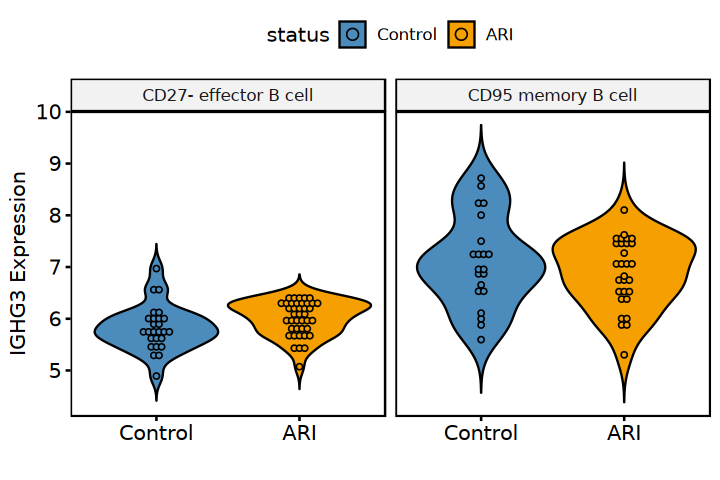

In [65]:
# plot the degs
options(repr.plot.width = 6, repr.plot.height = 4)
ig_exprs %>% ggpubr::ggviolin(
    x = "status", add = c("dotplot"),
    ylab = "IGHG3 Expression", xlab = "",
    y = "normalized_counts", palette = ari_con_colors,
    fill = "status", facet.by = "cell_type",
    add.params = list(binwidth = 1 / 10)
)
ggsave(file.path(fig_path, paste0(proj_name, "IGHG3_expression_violinplot.pdf")), width = 6, height = 4)


In [23]:
naive_igh <- aim1_degs %>% filter(cell_type == "Core naive B cell" & str_detect(gene, "IGH") & pvalue < 0.05)
naive_igh


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig,log_pval_dir
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Core naive B cell,IGHG3,56.89525,0.45301024,0.21253161,2.131496,0.03304832,0.16713274,0.09249430,<0.2,3.409785
Core naive B cell,IGHM,8688.04900,0.09686537,0.03555192,2.724618,0.00643760,0.06725795,0.03722178,*,5.045599


In [24]:
bnaive_ig_exprs <- GetExprsSE(naive_igh, aim1_pb_norm, assay = "normalized_counts")
bnaive_ig_exprs %>% head()


index,batch_id,hto_barcode,hto_category,pbmc_sample_id,pool_id,sample.sampleKitGuid,cohort.cohortGuid,subject.subjectGuid,subject.biologicalSex,⋯,status,psbulk_n_cells,psbulk_counts,batch_corr,age,scale_age,cell_type,gene,normalized_counts,celltype_gene
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,⋯,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
KT00052_Core naive B cell,B140,ATTGACCCGCGTTAG,singlet,PB00052-02,B140-P2,KT00052,CU1,CU1009,Female,⋯,ARI,873,3293751,other_batches,56,-0.01384281,Core naive B cell,IGHG3,6.292365,Core naive B cell: IGHG3
KT00056_Core naive B cell,B002,GGTTGCCAGATGTCA,singlet,PB00056-01,B002-P2,KT00056,CU1,CU1007,Female,⋯,ARI,461,1959603,other_batches,42,-0.88023966,Core naive B cell,IGHG3,6.777180,Core naive B cell: IGHG3
KT00057_Core naive B cell,B002,TGTCTTTCCTGCCAG,singlet,PB00057-01,B002-P2,KT00057,CU1,CU1003,Female,⋯,ARI,346,1371109,other_batches,21,-2.17983494,Core naive B cell,IGHG3,6.690446,Core naive B cell: IGHG3
KT00058_Core naive B cell,B001,CAGTAGTCACGGTCA,singlet,PB00058-01,B001-P1,KT00058,CU1,CU1002,Female,⋯,ARI,313,896031,other_batches,78,1.34763796,Core naive B cell,IGHG3,6.530628,Core naive B cell: IGHG3
KT00060_Core naive B cell,B002,CAGTAGTCACGGTCA,singlet,PB00060-01,B002-P2,KT00060,CU1,CU1005,Female,⋯,ARI,332,1262350,other_batches,40,-1.00401064,Core naive B cell,IGHG3,6.747390,Core naive B cell: IGHG3
KT00063_Core naive B cell,B140,CAGTAGTCACGGTCA,singlet,PB00063-05,B140-P2,KT00063,CU1,CU1011,Male,⋯,ARI,378,1656178,other_batches,39,-1.06589613,Core naive B cell,IGHG3,6.630807,Core naive B cell: IGHG3


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


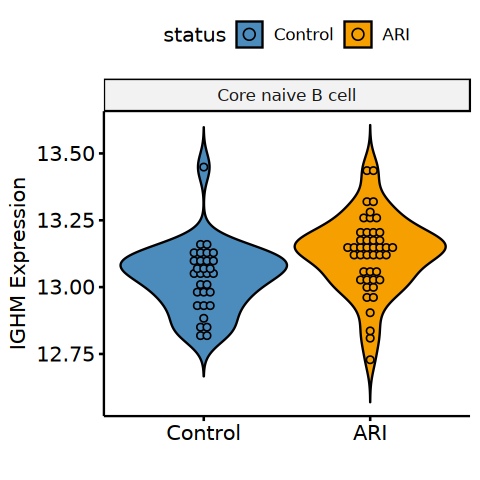

In [31]:
# plot the degs
options(repr.plot.width = 4, repr.plot.height = 4)
bnaive_ig_exprs %>%
    filter(gene == "IGHM") %>%
    ggpubr::ggviolin(
        x = "status", add = c("dotplot"), # title = 'Core naive B cell',
        ylab = "IGHM Expression", xlab = "",
        y = "normalized_counts", palette = ari_con_colors,
        fill = "status",
    ) +
    facet_wrap(vars(cell_type), scale = "free_y")
ggsave(file.path(fig_path, paste0(proj_name, "naiveB_ighm_expression_violinplot.pdf")), width = 4, height = 4)


In [68]:
naive_pax5 <- aim1_degs %>% filter(cell_type == "Core naive B cell" & str_detect(gene, "PAX5") & pvalue < 0.05)
naive_pax5
bnaive_pax5_exprs <- GetExprsSE(naive_pax5, aim1_pb_norm, assay = "normalized_counts")


cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig,log_pval_dir
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Core naive B cell,PAX5,335.3438,-0.1336125,0.05354083,-2.495525,0.01257708,0.07757783,0.04091586,*,-4.375879


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


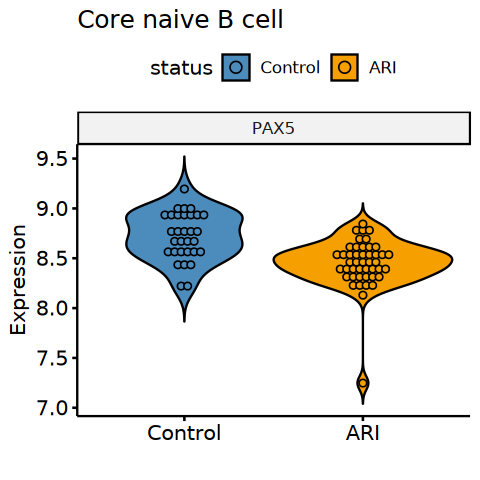

In [69]:
# plot the degs
options(repr.plot.width = 4, repr.plot.height = 4)
bnaive_pax5_exprs %>% ggpubr::ggviolin(
    x = "status", add = c("dotplot"), title = "Core naive B cell",
    ylab = "Expression", xlab = "",
    y = "normalized_counts", palette = ari_con_colors,
    fill = "status",
) +
    facet_wrap(vars(gene), scale = "free_y")
ggsave(file.path(fig_path, paste0(proj_name, "naiveB_pax5_expression_violinplot.pdf")), width = 4, height = 4)


# plot specific pathways for B naive

In [70]:
quiet_library("fgsea")


In [71]:
RankGene <- function(logfc_list, gmx = NULL, ct.col = "cell_type",
                     rank.col = "logfc", gene.col = "gene",
                     collapsePathways = FALSE,
                     ncores = NULL) {
  require(fgsea)
  # if no provided, Load and initialize pathway database
  if (is.null(gmx)) {
    gmxFile <- "/home/jupyter/data/reference/c2.cp.v7.2.symbols.gmt"
    colNames <- max(count.fields(file = gmxFile, sep = "\t"))
    colNames <- seq(from = 1, to = colNames)
    colNames <- as.character(colNames)
    gmx <- read.table(
      file = gmxFile,
      sep = "\t",
      quote = "\"",
      fill = TRUE,
      col.names = colNames,
      row.names = 1
    )
    gmx <- gmx[, -1]
    gmx <- apply(gmx, MARGIN = 1, FUN = function(x) {
      return(value = setdiff(unname(x), ""))
    })
    names(gmx) <- toupper(names(gmx))
  }

  # setup parallelization parameters
  if (is.null(ncores)) {
    ncores <- parallel::detectCores() - 3
  } else {
    (ncores <- ncores)
  }
  param <- BiocParallel::MulticoreParam(workers = ncores, progressbar = TRUE)

  # RUN GSEA per celltype
  celltypes <- unique(logfc_list %>% pull(.data[[ct.col]]))
  # create rank list based on lowest to higest gene fold-change
  rnkDF <- logfc_list %>%
    filter(!is.na(.data[[rank.col]])) %>%
    dplyr::arrange(.data[[rank.col]])
  rnk <- rnkDF %>%
    pull(.data[[rank.col]]) %>%
    as.numeric()
  names(rnk) <- rnkDF %>% pull(.data[[gene.col]])

  return(rnkDF)
}


In [72]:
Bna_aim1_deg <- aim1_degs %>% filter(cell_type == "Core naive B cell")
rank.col <- "log_pval_dir"
gene.col <- "gene"
Bna_aim1_rank <- Bna_aim1_deg %>%
      filter(!is.na(.data[[rank.col]])) %>%
      dplyr::arrange(.data[[rank.col]])
Bna_rank <- Bna_aim1_rank %>%
      pull(.data[[rank.col]]) %>%
      as.numeric()
names(Bna_rank) <- Bna_aim1_rank %>% pull(.data[[gene.col]])
# Bna_rank


In [73]:
# get pathway database
gmxFile <- "/home/jupyter/data/reference/c2.cp.v7.2.symbols.gmt"
colNames <- max(count.fields(file = gmxFile, sep = "\t"))
colNames <- seq(from = 1, to = colNames)
colNames <- as.character(colNames)
gmx <- read.table(
  file = gmxFile,
  sep = "\t",
  quote = "\"",
  fill = TRUE,
  col.names = colNames,
  row.names = 1
)
gmx <- gmx[, -1]
gmx <- apply(gmx, MARGIN = 1, FUN = function(x) {
  return(value = setdiff(unname(x), ""))
})
names(gmx) <- toupper(names(gmx))


In [74]:
gmx %>% str()


List of 2871
 $ BIOCARTA_FEEDER_PATHWAY                                                                                                                      : chr [1:9] "MPI" "HK1" "KHK" "PGM1" ...
 $ BIOCARTA_PROTEASOME_PATHWAY                                                                                                                  : chr [1:19] "RPN1" "PSMA1" "PSMA5" "RPN2" ...
 $ BIOCARTA_KREB_PATHWAY                                                                                                                        : chr [1:8] "FH" "SDHA" "OGDH" "SUCLA2" ...
 $ ST_INTERFERON_GAMMA_PATHWAY                                                                                                                  : chr [1:10] "STAT1" "PLA2G2A" "IFNG" "JAK2" ...
 $ ST_WNT_CA2_CYCLIC_GMP_PATHWAY                                                                                                                : chr [1:20] "ITPR1" "PDE6H" "CAMK2D" "PDE6D" ...
 $ ST_DIFFERENTIATION_PATHWAY_IN_PC1

In [75]:
# run GSEA by parallelization
param <- BiocParallel::MulticoreParam(workers = 15, progressbar = TRUE)
fgseaRes <- fgsea::fgsea(
    pathways = gmx,
    stats = Bna_rank,
    minSize = 10,
    maxSize = 500, nPermSimple = 10000,
    BPPARAM = param
)


  |======================================================================| 100%



In [76]:
# p1 <- plotEnrichment(gmx[["REACTOME_CELLULAR_RESPONSES_TO_EXTERNAL_STIMULI"]],
#                Bna_rank) + labs(title="Cellular Response to external Stimuli")
# p1
# ggsave(file.path(fig_path, 'AIM1_Bnaive_gseaplot_CELLULAR_RESPONSES_TO_EXTERNAL_STIMULI.png'),
#        width=4, height = 4)


In [78]:
# define a function to plot pathway enrichment
PlotPathway <- function(pathwayName, gmx, gene_list) {
  enrichmentPlot <- plotEnrichment(
    gmx[[pathwayName]],
    gene_list
  )
  data <- ggplot_build(enrichmentPlot)$data

  pathwayNameFormatted <- gsub("_", " ", pathwayName)
  # Create plot
  customPlot <- ggplot() +
    geom_line(data = data[[1]], aes(x = x, y = y), color = "purple") +
    geom_segment(data = data[[1]], aes(x = x, xend = x, y = -0.1, yend = 0), color = "black", size = 0.5) +
    ggtitle(pathwayNameFormatted) +
    labs(
      x = "Ranked Genes",
      y = "Enrichment Score",
      # caption = "ARI \u27F5\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u27F6 Control"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5), # Center the title
      plot.caption = element_text(hjust = 0.5, vjust = -0.5, size = 12.5),
      plot.margin = margin(t = 10, r = 10, b = 40, l = 10) # Add space below the plot
    )
  return(customPlot)
}


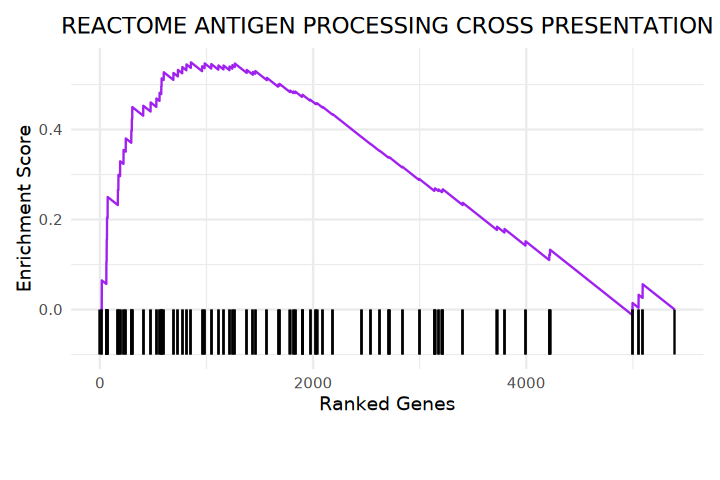

In [219]:
p1 <- PlotPathway(
       "REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION", gmx,
       Bna_rank
)
p1
ggsave(file.path(fig_path, "AIM1_Bnaive_gseaplot_REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION.png"),
       width = 4, height = 4
)


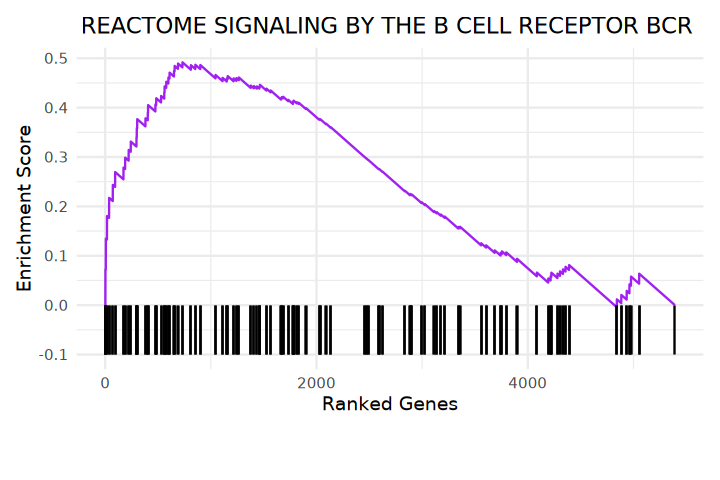

In [220]:
p1 <- PlotPathway(
       "REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR_", gmx,
       Bna_rank
)
p1

ggsave(file.path(fig_path, "AIM1_Bnaive_gseaplot_BCR.png"),
       width = 4, height = 4
)


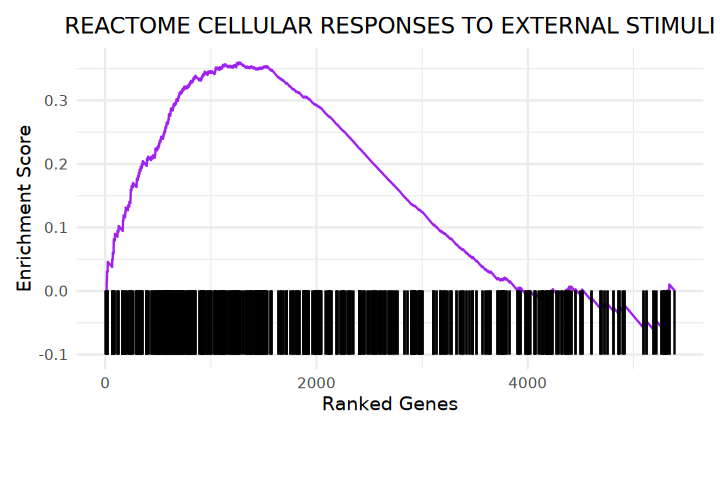

In [221]:
p1 <- PlotPathway(
       "REACTOME_CELLULAR_RESPONSES_TO_EXTERNAL_STIMULI", gmx,
       Bna_rank
)
p1
ggsave(file.path(fig_path, "AIM1_Bnaive_gseaplot_REACTOME_CELLULAR_RESPONSES_TO_EXTERNAL_STIMULI.png"),
       width = 4, height = 4
)


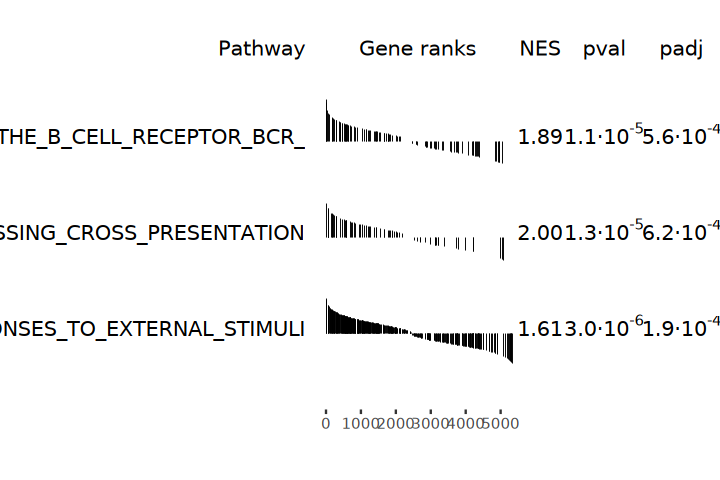

In [222]:
topPathways <- c(
       "REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR_",
       "REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION",
       "REACTOME_CELLULAR_RESPONSES_TO_EXTERNAL_STIMULI"
)

plotGseaTable(gmx[topPathways], Bna_rank, fgseaRes,
       gseaParam = 0.5
)
ggsave(file.path(fig_path, "AIM1_Bnaive_gseaplot_combined_pathway.png"),
       width = 6, height = 4
)


In [203]:
# define a function to plot pathway enrichment
PlotPathways <- function(pathways, gmx, gene_list) {
  pathway_data <- lapply(pathways, function(pathwayName) {
    gene_list <- Bna_rank
    enrichmentPlot <- plotEnrichment(
      gmx[[pathwayName]],
      gene_list
    )
    data <- ggplot_build(enrichmentPlot)$data[[1]] %>%
      as_tibble() %>%
      mutate(pathway = gsub("_", " ", pathwayName))
    return(data)
  }) %>% data.table::rbindlist()

  # Create plot
  p1 <- ggplot(pathway_data) +
    geom_line(aes(x = x, y = y, color = pathway)) +
    #  geom_segment(aes(x = x, color = pathway, xend = x, y = -0.1, yend = 0), size = 0.5) +
    # facet_wrap(vars(pathway)) +
    labs(
      x = "Ranked Genes",
      y = "Enrichment Score",
      # caption = "ARI \u27F5\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u2500\u27F6 Control"
    ) +
    theme_pubr() +
    theme(
      plot.title = element_text(hjust = 0.5), # Center the title
      plot.caption = element_text(hjust = 0.5, vjust = -0.5, size = 12.5),
      legend.position = c(1.2, 0.8), # Move legend inside the plot
      # legend.background = element_rect(fill = "white", color = "black")
    ) +
    scale_color_manual(values = npg_color)
  p2 <- ggplot(pathway_data) +
    geom_segment(aes(
      x = x, color = pathway, group = pathway,
      xend = x, y = -0.1, yend = 0
    ), size = 0.5) +
    facet_grid(vars(rows = pathway)) +
    theme_void() +
    ylab("") +
    xlab("") +
    theme(
      plot.title = element_text(hjust = 0.5), # Center the title
      plot.caption = element_text(hjust = 0.5, vjust = -0.5, size = 12.5),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank(), axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      strip.text.y = element_blank(),
      legend.position = "none"
    ) +
    scale_color_manual(values = npg_color)
  p_comb <- ggarrange(p1, p2,
    ncol = 1, # common.legend = TRUE, legend="right",
    heights = c(2, 1)
  )
  return(p_comb)
}


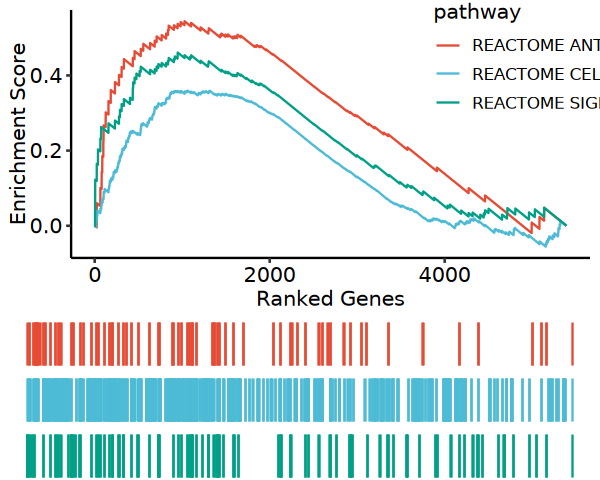

In [204]:
topPathways <- c(
       "REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR_",
       "REACTOME_ANTIGEN_PROCESSING_CROSS_PRESENTATION",
       "REACTOME_CELLULAR_RESPONSES_TO_EXTERNAL_STIMULI"
)
options(repr.plot.width = 5, repr.plot.height = 4)
p1 <- PlotPathways(
       topPathways, gmx,
       Bna_rank
)
p1
ggsave(file.path(fig_path, "AIM1_Bnaive_gseaplot_combined_pathway.pdf"),
       width = 5, height = 4
)


In [191]:
library("genekitr")




Welcome to use genekitr! (Vignette: https://www.genekitr.fun)
Citation for genekitr:
Liu, Y., Li, G. Empowering biologists to decode omics data: the Genekitr R package and web server. BMC Bioinformatics 24, 214 (2023). https://doi.org/10.1186/s12859-023-05342-9



In [199]:
# 3rd step: GSEA analysis
gs <- geneset::getReactome(org = "human")
gse <- genGSEA(genelist = sort(Bna_rank, decreasing = TRUE), geneset = gs)


In [203]:
gs %>% str()


List of 4
 $ geneset     :'data.frame':	125362 obs. of  2 variables:
  ..$ id  : chr [1:125362] "R-HSA-1059683" "R-HSA-1059683" "R-HSA-1059683" "R-HSA-1059683" ...
  ..$ gene: chr [1:125362] "3569" "3570" "3572" "3716" ...
 $ geneset_name:'data.frame':	2566 obs. of  2 variables:
  ..$ id  : chr [1:2566] "R-HSA-1059683" "R-HSA-109581" "R-HSA-109582" "R-HSA-109606" ...
  ..$ name: chr [1:2566] "Interleukin-6 signaling" "Apoptosis" "Hemostasis" "Intrinsic Pathway for Apoptosis" ...
 $ organism    : chr "hsapiens"
 $ type        : chr "reactome"


In [201]:
gse$gsea_df %>% filter(p.adjust < 0.05 & str_detect(Description, "BCR|Antigen"))


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,geneID,Count
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
R-HSA-1236975,R-HSA-1236975,Antigen processing-Cross presentation,72,0.5506736,2.005974,2.587085e-05,0.0004991946,0.0003837373,1262,"tags=47%, list=24%, signal=36%",9491/3106/8773/653361/5691/1535/5693/7979/8673/5692/10952/5701/695/5688/5683/5720/5710/23480/5690/5707/5689/7314/5704/3133/5706/6233/6891/9554/5685/5686/5698/5708/5702/9861/7311,35
R-HSA-983705,R-HSA-983705,Signaling by the B Cell Receptor (BCR),96,0.4701640,1.800559,1.206128e-04,0.0015713162,0.0012078909,730,"tags=26%, list=14%, signal=23%",930/973/9491/84876/5691/2280/5693/7979/5692/5777/5701/695/5532/5688/5683/974/5720/5710/5690/5707/5689/6500/8454/29760/7314/5704,26
R-HSA-1168372,R-HSA-1168372,Downstream signaling events of B Cell Receptor (BCR),69,0.4588419,1.660790,2.705512e-03,0.0183349367,0.0140943010,1466,"tags=49%, list=27%, signal=36%",9491/5691/2280/5693/7979/5692/5701/5532/5688/5683/5720/5710/5690/5707/5689/6500/8454/7314/5704/5706/6233/5685/5686/8915/5698/5708/5702/9861/7311/10213/4772/5709/84433/5478/808,35
